In [ ]:
import os 
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [ ]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
print("Train:\n")
print(train.isnull().sum().sort_values(ascending=False),"\n\n",train.isnull().sum()/train.shape[0] *100,"\n\n")
print("Test:\n")
print(test.isnull().sum().sort_values(ascending=False),"\n\n",test.isnull().sum()/test.shape[0] *100,"\n\n")

Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Id

In [ ]:
print("Outlet_Size:\n", train.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", train.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 




In [ ]:
print("test mode, train mode\n",[train['Outlet_Size'].mode().values[0], test['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


In [ ]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(
train['Outlet_Size'].dropna().mode().values[0])

#test
test['Outlet_Size'] = test['Outlet_Size'].fillna(
test['Outlet_Size'].dropna().mode().values[0])

#checking if we filled missing values
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

Text(0.5, 1.0, 'Item_Weight Boxplot')

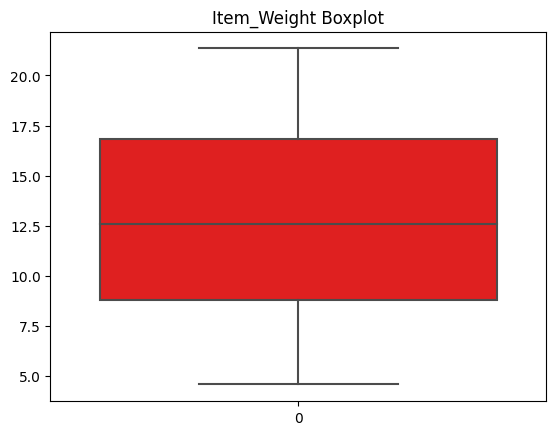

In [ ]:
sns.boxplot(data=train['Item_Weight'],orient="v", color = 'r')
plt.title("Item_Weight Boxplot")

same for the item weight

In [ ]:
train['Item_Weight'] = train['Item_Weight'].fillna(
train['Item_Weight'].dropna().mean())
test['Item_Weight'] = test['Item_Weight'].fillna(
test['Item_Weight'].dropna().mean())
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

In [ ]:
num = train.select_dtypes('number').columns.to_list()

cat = train.select_dtypes('object').columns.to_list()


BM_num =  train[num]

BM_cat = train[cat]


[train[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

In [ ]:
train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)


train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
train['Outlet_Age'], test['Outlet_Age']= train['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), test['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

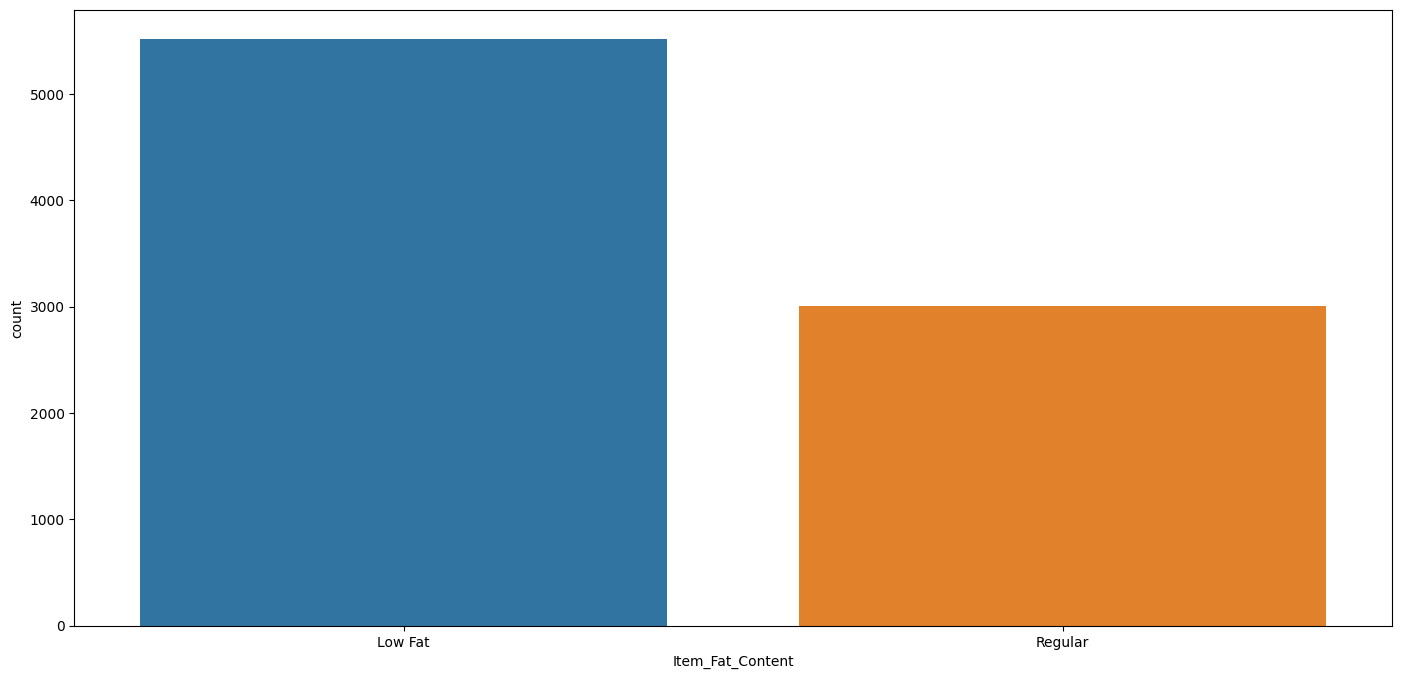

In [ ]:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
 
plt.figure(figsize=(17,8))
sns.countplot(x='Item_Fat_Content' , data=train )
plt.xlabel('Item_Fat_Content', fontsize=10)
plt.show()

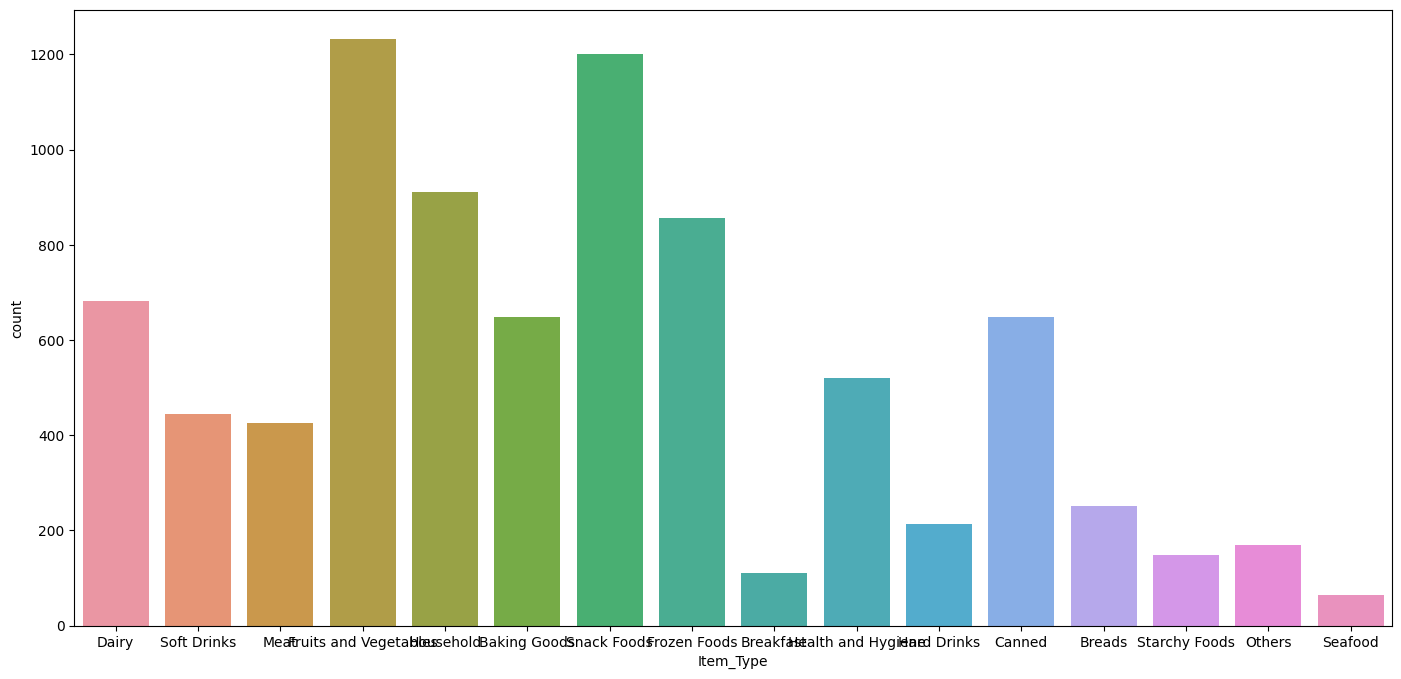

In [ ]:
plt.figure(figsize=(17,8))
sns.countplot(x='Item_Type' , data=train)
plt.xlabel('Item_Type', fontsize=10)
plt.show()

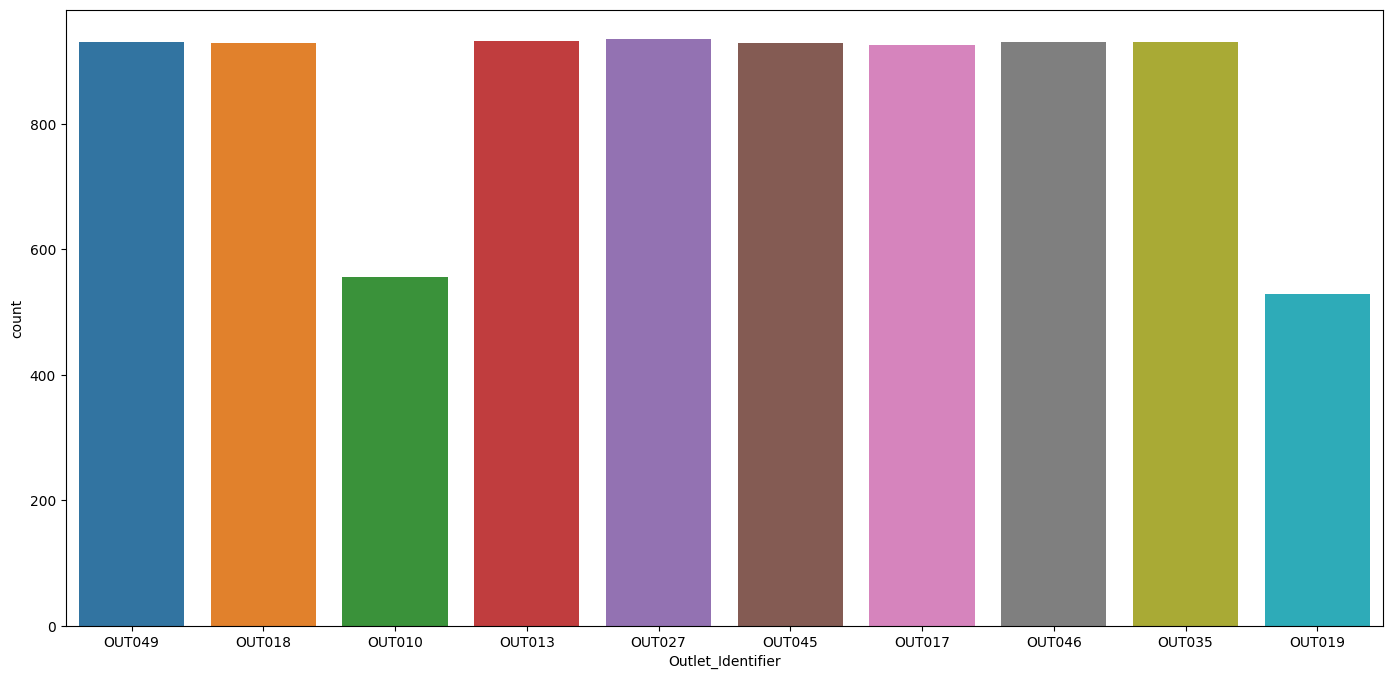

In [ ]:
plt.figure(figsize=(17,8))
sns.countplot(x='Outlet_Identifier' , data=train )
plt.xlabel('Outlet_Identifier', fontsize=10)
plt.show()

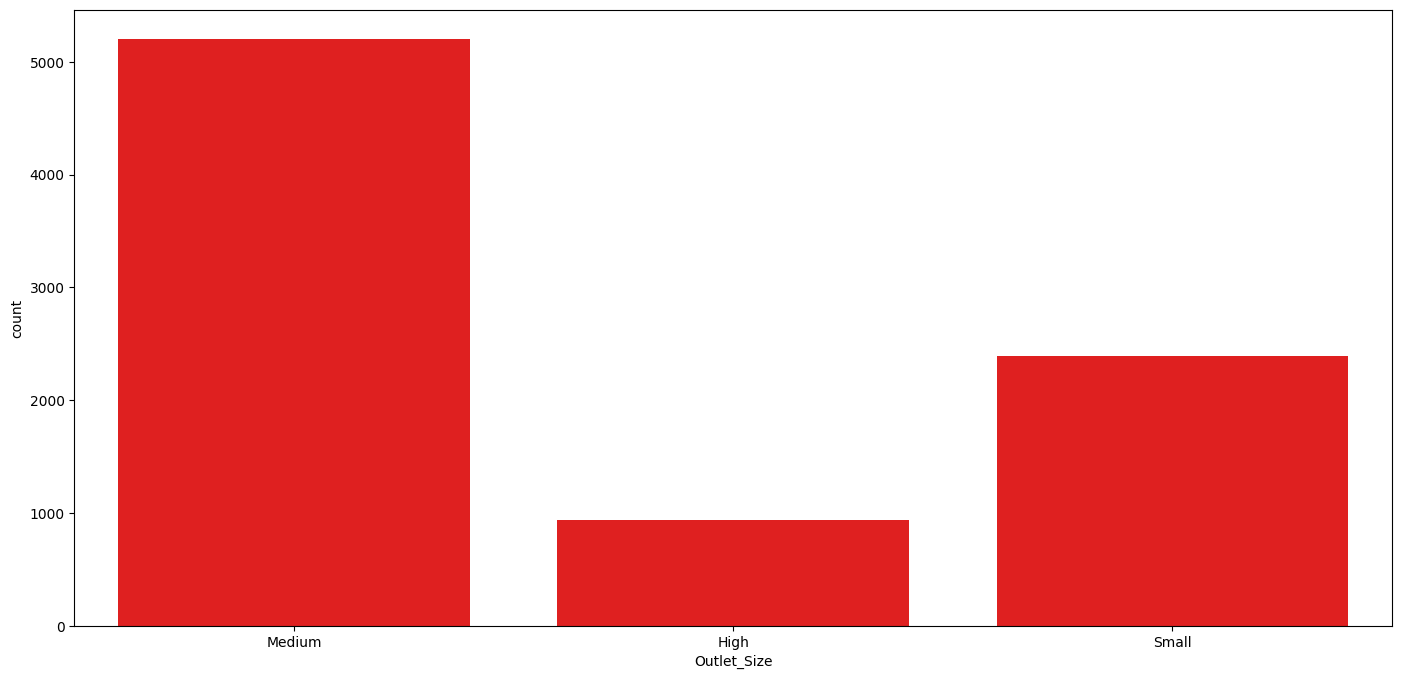

In [ ]:
plt.figure(figsize=(17,8))
sns.countplot(x='Outlet_Size' , data=train ,color="red")
plt.xlabel('Outlet_Size', fontsize=10)
plt.show()

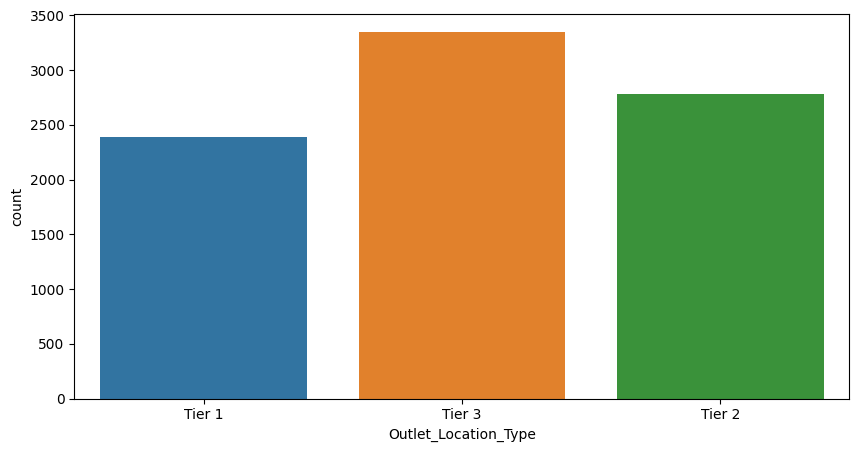

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Location_Type' , data=train )
plt.xlabel('Outlet_Location_Type', fontsize=10)
plt.show()

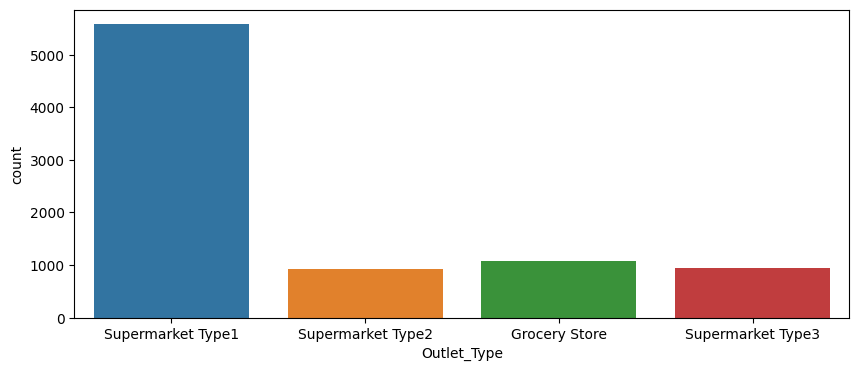

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=train)
plt.xlabel('Outlet_Type', fontsize=10)
plt.show()

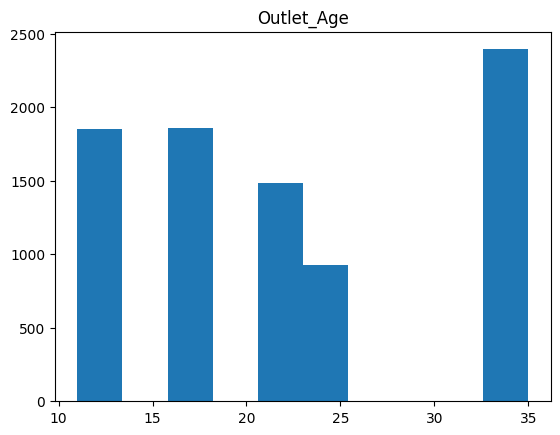

In [ ]:
num = train.select_dtypes('number').columns.to_list()

l =  train[num]

plt.hist(train['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

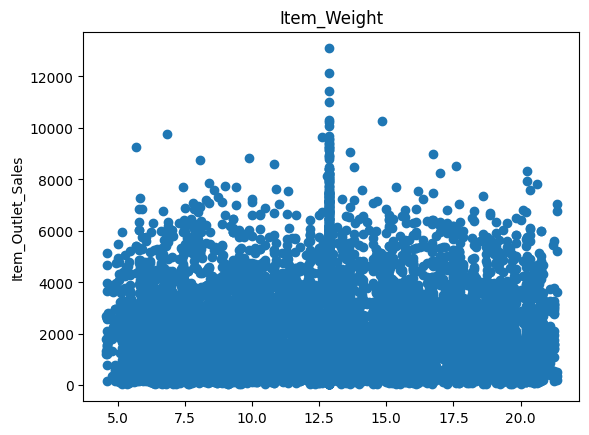

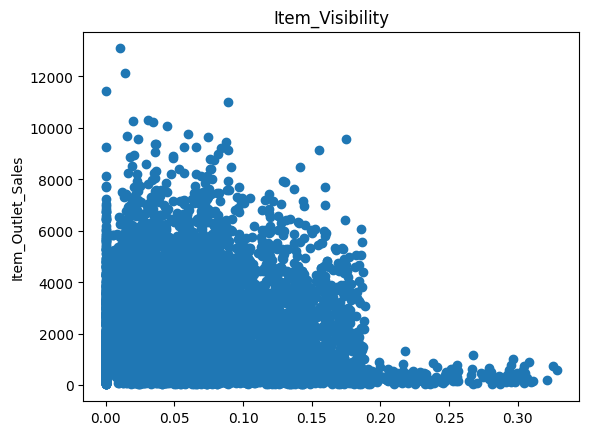

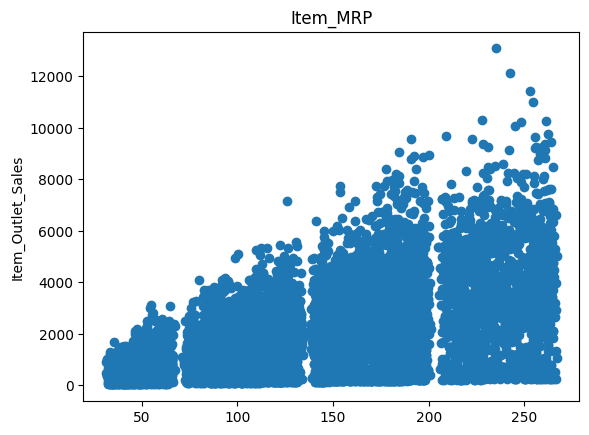

In [ ]:
for numeric in l[num[:3]]:
    plt.scatter(l[numeric], l['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

<ipython-input-46-9349f8f977e5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr() ,cmap='crest')


<Axes: >

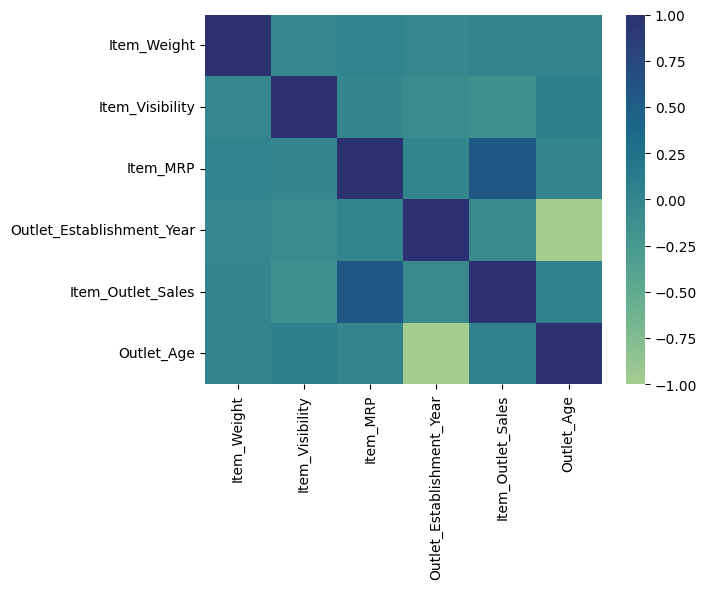

In [ ]:
sns.heatmap(train.corr() ,cmap='crest')

In [ ]:
BM_cat.apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [ ]:
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])
    
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


In [ ]:
cols = ['Item_Type','Outlet_Type']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(train[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(test[cols])).astype('int64')



tr_oh.columns = OH_encoder.get_feature_names_out(cols)
te_oh.columns = OH_encoder.get_feature_names_out(cols)


tr_oh.index = train.index
te_oh.index = test.index


tr_fe = pd.concat([train, tr_oh], axis=1)
te_fe = pd.concat([test, te_oh], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
tr_fe  = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [ ]:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2, random_state = 0)

In [ ]:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2, random_state = 0)
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,y,5)

 Mean Absolute Error: 1235.77

 Mean Squared Error: 1534045.13

 R^2 Score: -120.8851

LinearRegression() Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression() score: 0.558


In [ ]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv")  

In [ ]:
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)

RFR.fit(X_train, y_train)

y_predict = RFR.predict(X_test)
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)
print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)

 Mean Absolute Error: 663.25

 Mean Squared Error: 653042.71

 R^2 Score: -50.8865

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.53
0.52
0.55
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5469


In [ ]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")  


In [ ]:
LS = Lasso(alpha = 0.05)
LS.fit(X_train,y_train)
y_predict = LS.predict(X_test)
LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)
LS_CS  = round(CVS(LS, X, y, cv=5).mean(),4)
print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")
cross_val(LS,Lasso(alpha = 0.05),X,y,5)

 Mean Absolute Error: 1235.94

 Mean Squared Error: 1534222.86

 R^2 Score: -120.8993

Lasso(alpha=0.05) Scores:
0.57
0.55
0.55
0.56
0.56
Average Lasso(alpha=0.05) score: 0.5581


In [ ]:
Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Lasso_Regressor.to_csv("Lasso Regressor.csv")

In [ ]:
MAE= [LR_MAE,RFR_MAE,LS_MAE]
MSE= [LR_MSE,RFR_MSE,LS_MSE]
R_2= [LR_R_2,RFR_R_2,LS_R_2]
Cross_score= [LR_CS,RFR_CS,LS_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
1,Random Forest Regressor,663.25,653042.71,-50.8865,0.5920
0,Linear Regression,1235.77,1534045.13,-120.8851,0.5580
2,Lasso Regressor,1235.94,1534222.86,-120.8993,0.5581
